In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


In [9]:
data_df = pd.read_csv('C:/Users/GM/PycharmProjects/MMD6020_Final_Project/src/data/chbmit_preprocessed_data.csv')

In [10]:
data_df

,# FP1-F7,C3-P3,C4-P4,CZ-PZ,F3-C3,F4-C4,F7-T7,F8-T8,FP1-F3,FP2-F4,...,P3-O1,P4-O2,P7-O1,P7-T7,P8-O2,T7-FT9,T7-P7,T8-P8-0,T8-P8-1,Outcome
0,0.000020,0.000010,0.000022,0.000037,0.000032,0.000035,0.000016,0.000046,-0.000007,0.000043,...,0.000024,-0.000030,0.000010,-0.000011,-0.000037,0.000008,0.000012,0.000021,0.000021,0.0
1,0.000022,0.000008,0.000021,0.000039,0.000030,0.000032,0.000015,0.000039,-0.000006,0.000042,...,0.000026,-0.000017,0.000012,-0.000008,-0.000029,0.000010,0.000009,0.000023,0.000023,0.0
2,0.000021,0.000012,0.000021,0.000040,0.000025,0.000030,0.000013,0.000036,-0.000006,0.000040,...,0.000027,-0.000018,0.000014,-0.000009,-0.000034,0.000012,0.000009,0.000027,0.000027,0.0
3,0.000019,0.000012,0.000021,0.000039,0.000023,0.000028,0.000013,0.000035,-0.000008,0.000036,...,0.000030,-0.000024,0.000015,-0.000009,-0.000042,0.000009,0.000010,0.000033,0.000033,0.0
4,0.000019,0.000012,0.000021,0.000036,0.000023,0.000024,0.000012,0.000024,-0.000009,0.000032,...,0.000032,-0.000014,0.000017,-0.000008,-0.000031,0.000009,0.000008,0.000035,0.000035,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097145,0.000081,0.000047,0.000087,0.000074,0.000113,0.000063,0.000129,-0.000037,0.000102,-0.000106,...,-0.000036,0.000072,-0.000046,-0.000060,0.000070,-0.000169,0.000060,0.000070,0.000070,1.0
2097146,0.000093,0.000055,0.000087,0.000082,0.000133,0.000058,0.000133,-0.000036,0.000088,-0.000115,...,-0.000031,0.000087,-0.000049,-0.000067,0.000076,-0.000152,0.000068,0.000063,0.000063,1.0
2097147,0.000110,0.000061,0.000078,0.000085,0.000146,0.000049,0.000130,-0.000036,0.000076,-0.000119,...,-0.000033,0.000106,-0.000058,-0.000067,0.000075,-0.000145,0.000067,0.000062,0.000062,1.0
2097148,0.000133,0.000068,0.000082,0.000085,0.000157,0.000040,0.000123,-0.000033,0.000067,-0.000124,...,-0.000036,0.000107,-0.000073,-0.000073,0.000068,-0.000129,0.000073,0.000056,0.000056,1.0


In [11]:
df1 = data_df.sample(frac=1, random_state=666).reset_index(drop=True)
y = df1['Outcome']
X = df1.drop(['Outcome'], axis=1)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_val_test, y_train, y_val_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=666)
X_val, X_test, y_val, y_test = train_test_split(X_val_test,y_val_test,test_size=0.5, stratify=y_val_test, random_state=666)
X_train.shape, X_val.shape, X_test.shape

((1677720, 23), (209715, 23), (209715, 23))

In [15]:
# Use "gpu_hist" for training the model.
classi = xgb.XGBClassifier(tree_method="gpu_hist")
# Fit the model using predictor X and response y.
model_xgb = classi.fit(X_train, y_train)
print('Accuracy on training data: ', round(model_xgb.score(X_train,y_train),2))
result_xgb = model_xgb.score(X_test,y_test)
print('Accuracy on testing data: ', round(result_xgb*100,2))

Accuracy on training data:  0.84
Accuracy on testing data:  83.61


In [16]:
from sklearn.model_selection import RandomizedSearchCV

tuned_parameters = {
  'gamma': np.linspace(0, 2, num=50),
  'max_depth': np.linspace(0, 12, num=13, dtype=int),
    'max_delta_step': np.linspace(0,10, num=11),
     'scale_pos_weight': [0.1, 1.0]
  }



grid_search = RandomizedSearchCV(
    xgb.XGBClassifier(tree_method="gpu_hist"), tuned_parameters, n_iter=150, scoring='f1_macro', cv=5,
)
grid_search.fit(X_train, y_train);
print('Finished!')

C:\ProgramData\Miniconda3\envs\mmd\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Miniconda3\envs\mmd\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Miniconda3\envs\mmd\Lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\ProgramData\Miniconda3\envs\mmd\Lib\site-packages\xgboost\sklearn.py", line 1516, in fit
    self._Booster = train(
           

Finished!


In [17]:
print("Meilleur ensemble de paramètres trouvé")
print()
print(grid_search.best_params_)
print(grid_search.best_score_)

Meilleur ensemble de paramètres trouvé

{'scale_pos_weight': 1.0, 'max_depth': 12, 'max_delta_step': 0.0, 'gamma': 0.4897959183673469}
0.8888005567989226


In [24]:
# Use "gpu_hist" for training the model.
classi = xgb.XGBClassifier(tree_method="gpu_hist", scale_pos_weight = 1, max_depth = 12, max_delta_step = 0, gamma = 0.49)
# Fit the model using predictor X and response y.
model_xgb = classi.fit(X_train, y_train)
print('Accuracy on training data: ', round(model_xgb.score(X_train,y_train),2))
result_xgb = model_xgb.score(X_test,y_test)
print('Accuracy on testing data: ', round(result_xgb*100,2))

Accuracy on training data:  0.93
Accuracy on testing data:  88.83


f1 score: 0.884852119877291


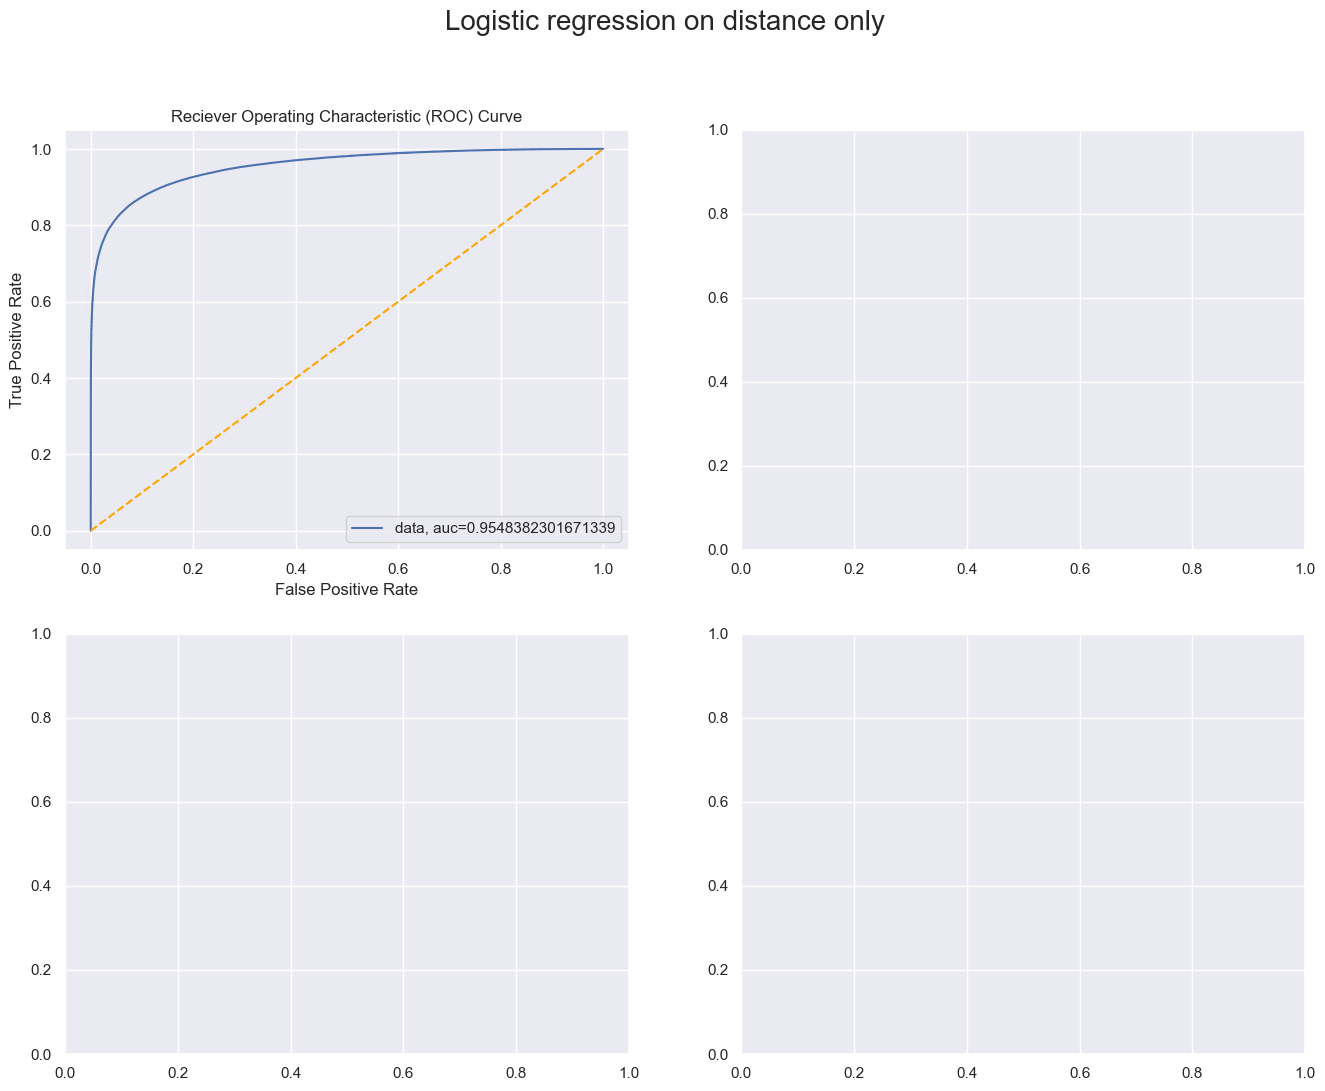

In [21]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(16,12))
y_pred_proba = model_xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
axes[0,0].plot(fpr,tpr,label="data, auc="+str(auc))
axes[0,0].plot([0,1],[0,1],color='orange',linestyle='--')
axes[0,0].set_xlabel('False Positive Rate')
axes[0,0].set_ylabel('True Positive Rate')
axes[0,0].set_title('Reciever Operating Characteristic (ROC) Curve')
axes[0,0].legend(loc=4)
fig.suptitle("Logistic regression on distance only", fontsize = 20)
f1 = metrics.f1_score(y_test, model_xgb.predict(X_test))
print(f"f1 score: {f1}")

Text(0.5, 1.0, 'Calibration curve')

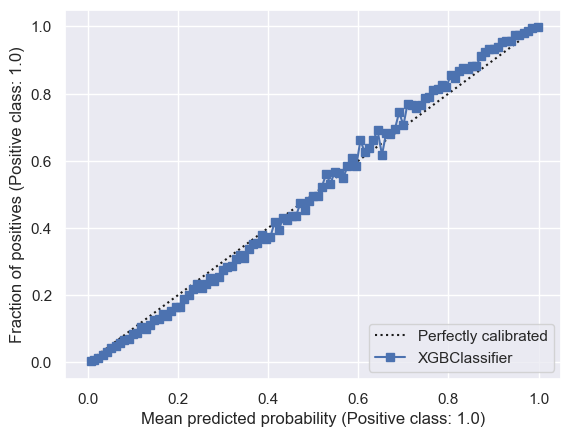

In [22]:
from sklearn.calibration import CalibrationDisplay
disp_test = CalibrationDisplay.from_estimator(model_xgb,X_test, y_test, n_bins = 105)
disp_test.plot(ax=axes[1,1])
axes[1,1].set_title("Calibration curve")

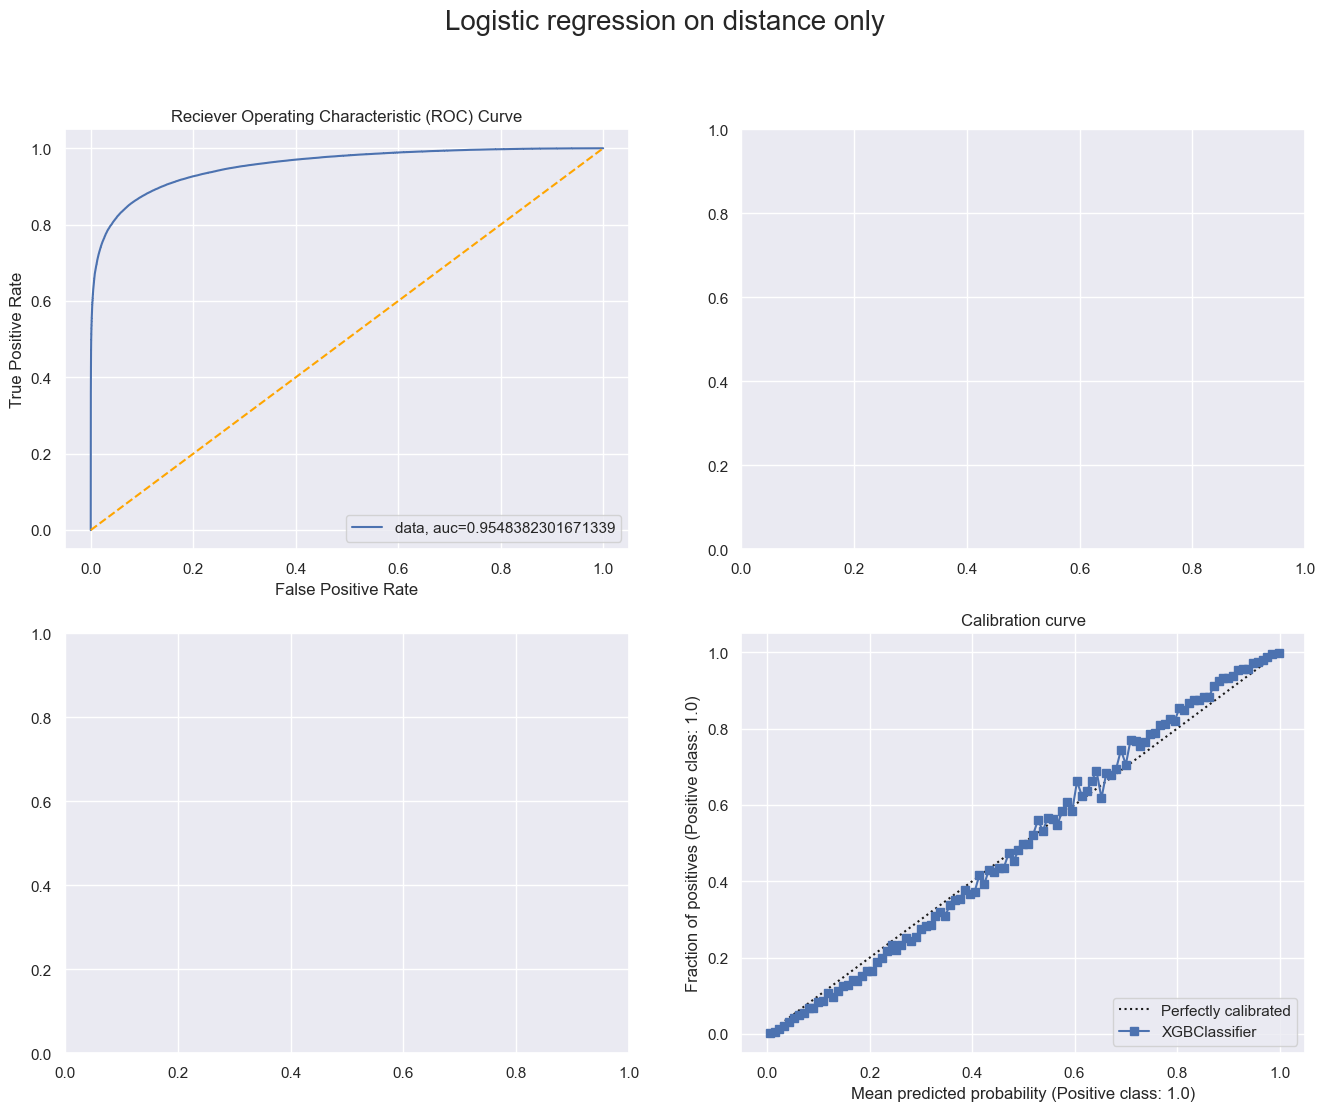

In [23]:
fig